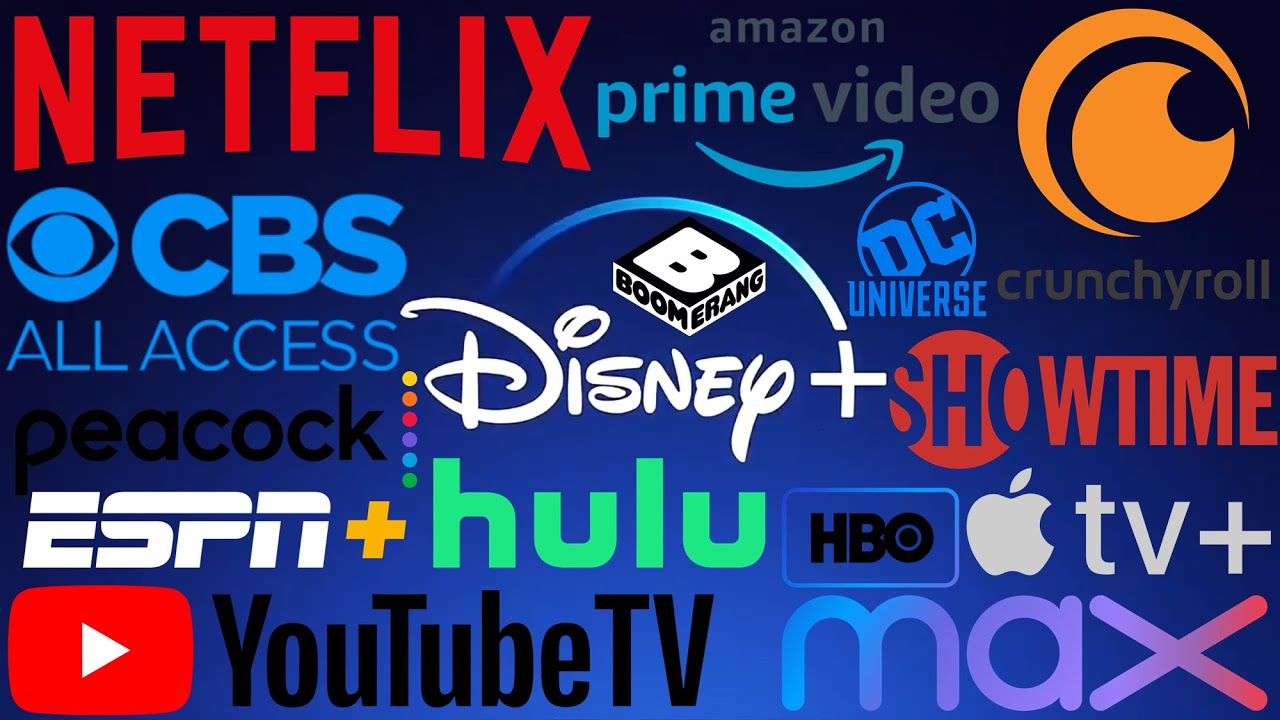

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
amazon_credits = pd.read_csv('amazon_credits.csv')
amazon_titles = pd.read_csv('amazon_titles.csv')
apple_credits = pd.read_csv('apple_credits.csv')
apple_titles = pd.read_csv('apple_titles.csv')
disney_credits = pd.read_csv('disney_credits.csv')
disney_titles = pd.read_csv('disney_titles.csv')
hbo_credits = pd.read_csv('hbo_credits.csv')
hbo_titles = pd.read_csv('hbo_titles.csv')
netflix_credits = pd.read_csv('netflix_credits.csv')
netflix_titles = pd.read_csv('netflix_titles.csv')
paramount_credits = pd.read_csv('paramount_credits.csv')
paramount_titles = pd.read_csv('paramount_titles.csv')

In [3]:
amazon_credits.head(3)
amazon_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140553 entries, 0 to 140552
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  140553 non-null  int64 
 1   id         140553 non-null  object
 2   name       140553 non-null  object
 3   character  122705 non-null  object
 4   role       140553 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.4+ MB


In [4]:
amazon_titles.head(3)
amazon_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10873 non-null  object 
 1   title                 10873 non-null  object 
 2   type                  10873 non-null  object 
 3   description           10729 non-null  object 
 4   release_year          10873 non-null  int64  
 5   age_certification     3688 non-null   object 
 6   runtime               10873 non-null  int64  
 7   genres                10873 non-null  object 
 8   production_countries  10873 non-null  object 
 9   seasons               1551 non-null   float64
 10  imdb_id               10172 non-null  object 
 11  imdb_score            9765 non-null   float64
 12  imdb_votes            9753 non-null   float64
 13  tmdb_popularity       10302 non-null  float64
 14  tmdb_score            8747 non-null   float64
dtypes: float64(5), int6

In [5]:
ott_content = pd.concat([amazon_titles,apple_titles, disney_titles,hbo_titles,netflix_titles,paramount_titles], 
                        axis = 0).reset_index()

In [6]:
ott_content.drop('index', axis = 1, inplace = True)

In [7]:
ott_content.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400


In [8]:
ott_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25246 entries, 0 to 25245
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25246 non-null  object 
 1   title                 25246 non-null  object 
 2   type                  25246 non-null  object 
 3   description           25050 non-null  object 
 4   release_year          25246 non-null  int64  
 5   age_certification     12097 non-null  object 
 6   runtime               25246 non-null  int64  
 7   genres                25246 non-null  object 
 8   production_countries  25246 non-null  object 
 9   seasons               5791 non-null   float64
 10  imdb_id               23260 non-null  object 
 11  imdb_score            22646 non-null  float64
 12  imdb_votes            22586 non-null  float64
 13  tmdb_popularity       24519 non-null  float64
 14  tmdb_score            22109 non-null  float64
dtypes: float64(5), int6

In [9]:
ott_content[ott_content.duplicated()== True].shape

(1884, 15)

1884 content is duplicated

In [10]:
ott_content[ott_content.duplicated()== True].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
11321,tm57241,Never Been Kissed,MOVIE,"Josie Geller, a baby-faced junior copywriter a...",1999,PG-13,107,"['comedy', 'drama', 'romance']",['US'],NaN,tt0151738,6.0,93238.0,17.420,6.180
11387,ts22130,Rolie Polie Olie,SHOW,Rolie Polie Olie was a children's television s...,1998,TV-Y,21,"['animation', 'comedy', 'family', 'fantasy', '...","['CA', 'FR', 'US', 'GB']",6.0,tt0172049,6.3,3012.0,13.848,6.600
11586,tm98015,The Last Song,MOVIE,A drama centered on a rebellious girl who is s...,2010,PG,107,"['drama', 'romance', 'music']",['US'],NaN,tt1294226,6.0,89378.0,15.081,7.242
11613,ts22233,Shake It Up,SHOW,Best pals CeCe and Rocky dream of dancing star...,2010,TV-G,25,"['comedy', 'family']",['US'],3.0,tt0453993,8.0,88.0,41.672,7.800
11822,ts7273,Doc McStuffins,SHOW,A young African-American girl aspires to be a ...,2012,TV-G,22,"['animation', 'family', 'fantasy', 'music']",['US'],6.0,tt1710295,6.6,2551.0,35.228,5.800


In [11]:
ott_content = ott_content.drop_duplicates()

In [12]:
ott_content[ott_content.duplicated()==True].shape

(0, 15)

In [13]:
ott_content.info()
ott_content.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23362 entries, 0 to 25245
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    23362 non-null  object 
 1   title                 23362 non-null  object 
 2   type                  23362 non-null  object 
 3   description           23167 non-null  object 
 4   release_year          23362 non-null  int64  
 5   age_certification     11381 non-null  object 
 6   runtime               23362 non-null  int64  
 7   genres                23362 non-null  object 
 8   production_countries  23362 non-null  object 
 9   seasons               5623 non-null   float64
 10  imdb_id               21412 non-null  object 
 11  imdb_score            20804 non-null  float64
 12  imdb_votes            20744 non-null  float64
 13  tmdb_popularity       22642 non-null  float64
 14  tmdb_score            20362 non-null  float64
dtypes: float64(5), int6

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433


In [14]:
# Missing data
for i in ott_content.columns:
    null_rate = ott_content[i].isna().sum()/len(ott_content) *100
    if null_rate > 0:
        print("{} null rate: {}%".format(i,round(null_rate,2)))

description null rate: 0.83%
age_certification null rate: 51.28%
seasons null rate: 75.93%
imdb_id null rate: 8.35%
imdb_score null rate: 10.95%
imdb_votes null rate: 11.21%
tmdb_popularity null rate: 3.08%
tmdb_score null rate: 12.84%


In [15]:
# ott_content.genres.unique()
# ott_content.production_countries.unique()
print(ott_content.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


These two columns contain values in a list. In order to better access that values we need to work with single values

In [16]:
ott_content['genres'] = ott_content['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_1420/1032821507.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ott_content['genres'] = ott_content['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')


In [17]:
ott_content['genre'] = ott_content['genres'].str.split(',').str[0]

In [19]:
ott_content['production_countries'] = ott_content['production_countries'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_1420/921581271.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ott_content['production_countries'] = ott_content['production_countries'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')


In [20]:
ott_content['production_country'] = ott_content['production_countries'].str.split(',').str[0]

In [21]:
ott_content.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"drama, family, fantasy, romance, comedy",US,NaN,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"comedy, war",US,NaN,tt0023969,7.8,60933.0,9.013,7.357,comedy,US
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"drama, romance, comedy",US,NaN,tt0032599,7.8,60244.0,14.759,7.433,drama,US
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family",US,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"western, drama, romance, action",US,NaN,tt0040724,7.8,32210.0,12.400,7.400,western,US


In [22]:
ott_content.drop(columns = ['genres','production_countries'], inplace = True)

In [23]:
ott_content.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,NaN,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,NaN,tt0023969,7.8,60933.0,9.013,7.357,comedy,US
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,NaN,tt0032599,7.8,60244.0,14.759,7.433,drama,US
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,NaN,tt0040724,7.8,32210.0,12.400,7.400,western,US


In [26]:
ott_content.genre.unique()

array(['drama', 'comedy', 'western', 'romance', 'action', 'fantasy',
       'horror', 'thriller', 'documentation', 'music', 'crime', '', 'war',
       'reality', 'scifi', 'history', 'family', 'animation', 'sport',
       'european'], dtype=object)

In [27]:
ott_content.production_country.unique()

array(['US', 'GB', 'SU', 'DE', 'MX', 'CA', 'IN', '', 'SE', 'IT', 'MA',
       'HK', 'FR', 'JP', 'PR', 'ES', 'IE', 'PH', 'CH', 'RO', 'YU', 'KR',
       'TW', 'MC', 'IL', 'EG', 'RU', 'AU', 'NZ', 'AT', 'ZA', 'LI', 'BR',
       'DK', 'IR', 'PT', 'BE', 'FI', 'AR', 'NL', 'ID', 'VE', 'XC', 'NO',
       'BG', 'CN', 'TH', 'CL', 'LU', 'DO', 'CO', 'AE', 'PL', 'SK', 'JM',
       'IS', 'RS', 'CZ', 'SG', 'GR', 'HU', 'LT', 'UA', 'KZ', 'NG', 'UY',
       'MT', 'AF', 'TR', 'VN', 'KE', 'BO', 'GE', 'TT', 'BY', 'MY', 'PK',
       'PE', 'XK', 'TC', 'LB', 'NP', 'MN', 'NI', 'SB', 'CR', 'PA', 'UZ',
       'NA', 'KH', 'QA', 'CM', 'EE', 'CU', 'LV', 'SY', 'BM', 'IO', 'PF',
       'HN', 'TN', 'EC', 'BD', 'MK', 'CI', 'BW', 'DZ', 'SN', 'GT', 'ET',
       'PS', 'SA', 'CD', 'GL', 'JO', 'KW', 'PY', 'IQ', 'TZ', 'KG', 'BT',
       'AO', 'GH', 'ZW', 'MW', 'MU', 'FO', 'ZM', 'BS'], dtype=object)

In [28]:
ott_content['genre'] = ott_content['genre'].replace('', np.nan)
ott_content['production_country'] = ott_content['production_country'].replace('',np.nan)

In [30]:
len(ott_content.loc[(ott_content['seasons'].isna()) & (ott_content['type'] == 'MOVIE')]) == ott_content.seasons.isna().sum()

True

In [32]:
ott_content['seasons'].fillna(0, inplace=True)

In [33]:
ott_content.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,tt0023969,7.8,60933.0,9.013,7.357,comedy,US
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,0.0,tt0032599,7.8,60244.0,14.759,7.433,drama,US
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,0.0,tt0040724,7.8,32210.0,12.400,7.400,western,US


In [35]:
lt = []
for i in ott_content['id']:
    movie_streaming = []
    if i in amazon_titles['id'].values:
        movie_streaming.append('amazon')
    if i in apple_titles['id'].values:
        movie_streaming.append('appletv')
    if i in disney_titles['id'].values:
        movie_streaming.append('disney+')
    if i in hbo_titles['id'].values:
        movie_streaming.append('hbomax')
    if i in netflix_titles['id'].values:
        movie_streaming.append('netflix')
    if i in paramount_titles['id'].values:
        movie_streaming.append('paramount+')
    lt.append(movie_streaming)

In [36]:
ott_content['streaming_platform'] = lt

In [37]:
ott_content.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,tt0038650,8.6,467766.0,27.611,8.261,drama,US,[amazon]
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,tt0023969,7.8,60933.0,9.013,7.357,comedy,US,[amazon]
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,0.0,tt0032599,7.8,60244.0,14.759,7.433,drama,US,"[amazon, paramount+]"
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US,[amazon]
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,0.0,tt0040724,7.8,32210.0,12.400,7.400,western,US,"[amazon, paramount+]"


In [38]:
movies = ott_content[ott_content['type'] == 'MOVIE'].copy().reset_index()
movies.drop(['index'], axis=1, inplace=True)

shows = ott_content[ott_content['type'] == 'SHOW'].copy().reset_index()
shows.drop(['index'], axis=1, inplace=True)

In [39]:
movies.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,tt0038650,8.6,467766.0,27.611,8.261,drama,US,[amazon]
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,tt0023969,7.8,60933.0,9.013,7.357,comedy,US,[amazon]
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,0.0,tt0032599,7.8,60244.0,14.759,7.433,drama,US,"[amazon, paramount+]"
3,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,0.0,tt0040724,7.8,32210.0,12.400,7.400,western,US,"[amazon, paramount+]"
4,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1947,NaN,171,0.0,tt0038351,8.1,66209.0,16.056,7.838,drama,US,[amazon]


In [40]:
shows.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US,[amazon]
1,ts37076,The Jack Benny Program,SHOW,Laugh along with funnyman Jack Benny as he bri...,1950,NaN,30,21.0,tt0042116,8.6,1529.0,9.681,7.500,comedy,US,[amazon]
2,ts55748,What's My Line?,SHOW,Four panelists must determine guests' occupati...,1950,NaN,30,18.0,tt1036980,8.5,1658.0,45.113,7.200,reality,US,[amazon]
3,ts224955,The Miracle Rider,SHOW,NaN,1935,NaN,20,1.0,NaN,NaN,NaN,0.977,NaN,NaN,US,[amazon]
4,ts3386,The Avengers,SHOW,The Avengers is a British television series cr...,1961,TV-14,51,8.0,tt0054518,8.3,8195.0,42.586,7.853,scifi,GB,[amazon]
